In [157]:
import pandas as pd
gas = 'Natural Gas'
oil = 'Heating Oil'
other = 'Other1'
elec = 'Electricity'

In [138]:
fuel_res_path = "raw_data/Canada/res_ca_e_1.xls"
app_res_path = "raw_data/Canada/res_ca_e_2.xls"
fuel_com_path = "raw_data/Canada/com_ca_e_1.xls"
app_com_path = "raw_data/Canada/com_ca_e_4.xls"

In [130]:
def process_data(filepath):
    data = pd.read_excel(filepath).dropna(how="all").drop([3,5,6], axis='index').fillna(0)
    data.set_index('Unnamed: 1', inplace=True)
    data.columns = data.iloc[0].astype(int)
    data = data.drop(data.columns[0],axis=1)[1:]
    return data

In [198]:
fuel_res = process_data(fuel_res_path)
app_res = process_data(app_res_path)
fuel_com = process_data(fuel_com_path)
app_com = process_data(app_com_path)
fuel_res

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unnamed: 1,,,,,,,,,,,,,,,,,,,
Total Energy Use (PJ),1491.159294,1433.124248,1504.841503,1514.430000,1516.063072,1496.523084,1443.325503,1563.109388,1567.671623,1530.410397,1489.793860,1575.845607,1508.376953,1568.977621,1614.620518,1559.512405,1464.178407,1510.585879,1616.476817
Energy Use by Energy Source (PJ),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Electricity,497.577000,504.786000,517.428000,532.760000,543.527000,543.552000,530.353000,568.236000,576.168000,580.700000,578.350000,598.679000,593.894000,616.878000,621.578000,613.401000,598.168000,604.313000,621.349000
Natural Gas,646.006000,600.496000,640.207000,670.180000,651.079000,646.602000,618.729000,686.085000,691.918000,660.543000,615.325000,682.361000,632.253000,685.562000,732.229000,689.678000,612.611000,659.194000,750.077000
Heating Oil,135.861294,129.100248,131.614503,122.790000,136.242072,127.037084,117.920503,129.633388,116.441623,113.047397,107.642860,103.104607,86.263953,76.280621,72.845518,70.248405,64.043407,58.452879,59.318817
Other1,12.015000,12.842000,12.392000,12.400000,12.015000,14.532000,15.123000,17.055000,18.244000,16.320000,17.476000,18.701000,20.766000,16.357000,15.068000,14.785000,17.256000,17.326000,15.732000
Wood,199.700000,185.900000,203.200000,176.300000,173.200000,164.800000,161.200000,162.100000,164.900000,159.800000,171.000000,173.000000,175.200000,173.900000,172.900000,171.400000,172.100000,171.300000,170.000000
Shares (%),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Electricity,33.368467,35.222766,34.384219,35.178912,35.851213,36.320990,36.745211,36.352926,36.753105,37.944070,38.820807,37.990968,39.373049,39.317196,38.496848,39.332871,40.853491,40.005206,38.438473


In [167]:
def sum_elec_for_heat(year):
    "Sums the electricity used for appliances, lighting and space cooling"
    res = fuel_res[2:8][year][elec] - sum(app_res[2018][4:7].values)
    com = fuel_com[2:8][year][elec] - sum(app_com[2018][4:9].values)
    return res + com

renewable_share = 433242/653669

In [204]:
def create_summary_dict(year):
    summary_dict = {
    'Fossil gas': fuel_res[3:8][year]["Natural Gas"] + fuel_com[3:8][year]["Natural Gas"],
    'Oil products': fuel_res[3:8][year]["Heating Oil"] + fuel_com[3:8][year]["Light Fuel Oil and Kerosene"] + fuel_com[3:8][year]["Heavy Fuel Oil"],
    'Other fossil fuels': fuel_res[3:8][year][other] + fuel_com[3:8][year]["Steam"] + fuel_com[3:8][year][other],
    'Direct renewables': fuel_res[3:8][year]["Wood"],
    'Heat pumps': 0,  # add heat pumps in later
    'District heat':0,
    'Electricity': sum_elec_for_heat(year),
    'Non-renewable electricity':sum_elec_for_heat(year)*(1-renewable_share),
    'Renewable electricity':sum_elec_for_heat(year)*renewable_share,
    'Renewable district heat':0,
    'Ambient heat':0
    }
    return summary_dict


years = fuel_res.columns
total = {year : create_summary_dict(year) for year in years}
total

{2000: {'Fossil gas': 1150.095,
  'Oil products': 209.47485068132818,
  'Other fossil fuels': 48.184,
  'Direct renewables': 199.7,
  'Heat pumps': 0,
  'District heat': 0,
  'Electricity': 94.73702976019706,
  'Non-renewable electricity': 31.94674867394806,
  'Renewable electricity': 62.790281086248996,
  'Renewable district heat': 0,
  'Ambient heat': 0},
 2001: {'Fossil gas': 1088.5439999999999,
  'Oil products': 204.93872240973408,
  'Other fossil fuels': 49.138000000000005,
  'Direct renewables': 185.9,
  'Heat pumps': 0,
  'District heat': 0,
  'Electricity': 108.64578976019709,
  'Non-renewable electricity': 36.63699135108283,
  'Renewable electricity': 72.00879840911426,
  'Renewable district heat': 0,
  'Ambient heat': 0},
 2002: {'Fossil gas': 1157.4019999999991,
  'Oil products': 209.1129737199449,
  'Other fossil fuels': 47.824999999999996,
  'Direct renewables': 203.2,
  'Heat pumps': 0,
  'District heat': 0,
  'Electricity': 153.14092976019708,
  'Non-renewable electricit

In [213]:
total_df = pd.DataFrame(total).T
total_df

,Fossil gas,Oil products,Other fossil fuels,Direct renewables,Heat pumps,District heat,Electricity,Non-renewable electricity,Renewable electricity,Renewable district heat,Ambient heat
2000,1150.095,209.474851,48.184,199.7,0.0,0.0,94.737030,31.946749,62.790281,0.0,0.0
2001,1088.544,204.938722,49.138,185.9,0.0,0.0,108.645790,36.636991,72.008798,0.0,0.0
2002,1157.402,209.112974,47.825,203.2,0.0,0.0,153.140930,51.641421,101.499509,0.0,0.0
2003,1195.311,214.340314,44.816,176.3,0.0,0.0,181.316250,61.142561,120.173688,0.0,0.0
2004,1165.187,220.098741,46.160,173.2,0.0,0.0,187.905755,63.364641,124.541113,0.0,0.0
2005,1151.471,196.368836,47.284,164.8,0.0,0.0,184.896550,62.349892,122.546657,0.0,0.0
2006,1087.278,172.454772,47.614,161.2,0.0,0.0,166.258550,56.064879,110.193671,0.0,0.0
2007,1168.369,183.767663,55.085,162.1,0.0,0.0,222.951550,75.182610,147.768940,0.0,0.0
2008,1188.684,156.654193,58.998,164.9,0.0,0.0,245.429550,82.762529,162.667021,0.0,0.0
2009,1171.103,142.394921,51.158,159.8,0.0,0.0,249.524550,84.143424,165.381126,0.0,0.0


In [205]:
plot_1_filt = ['Fossil gas', 'Oil products','Other fossil fuels', 'Direct renewables', 'Heat pumps', 'District heat', 'Electricity']
plot_2_filt = ['Fossil gas', 'Oil products','Other fossil fuels', 'Direct renewables', 'Non-renewable electricity', 'Renewable electricity', 'Renewable district heat', 'Ambient heat']

<AxesSubplot:>

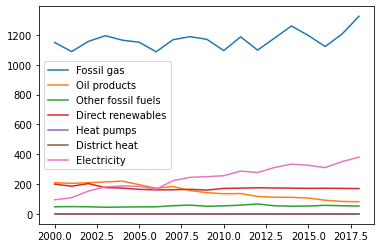

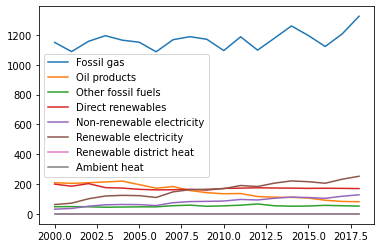

In [212]:
total_df[plot_1_filt].plot()
total_df[plot_2_filt].plot()

In [216]:
""" TO SEND TO MAIN PLOT """

total_df[plot_1_filt].loc[2018]
total_df[plot_2_filt].loc[2018]

Fossil gas                   1325.704000
Oil products                   81.766941
Other fossil fuels             52.537000
Direct renewables             170.000000
Non-renewable electricity     128.457523
Renewable electricity         252.479026
Renewable district heat         0.000000
Ambient heat                    0.000000
Name: 2018, dtype: float64